In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Imagine this simple economy:

1. 100k houses, and the prices they can sell for ("true_val") if you put them on the market
2. Owners guess how much they can sell for, and their guesses have std errors of 10%
3. Zillow's model is really good - It has just half the error! (Std of errors is only 5%)
4. Zillow offers to buy all houses at its valuation. Homeowners accept if they think the offer is 20% higher than their own guess. ("We'd be dumb NOT to sell!")



In [15]:
rng = np.random.default_rng(42) # to pull random numbers from

house_mkt = pd.DataFrame() # to store data
house_mkt['true_val']      = rng.uniform(250000,2500000,100000) 

# owners guess value, 10% std error
house_mkt['owner_error%']  = rng.normal(0,.10,100000) 
house_mkt['owner_guess']   = house_mkt['true_val']*(1+house_mkt['owner_error%'])

# zillows super model only has 5% std error
house_mkt['zillow_error%'] = rng.normal(0,.05,100000) 
house_mkt['zillow_guess']  = house_mkt['true_val']*(1+house_mkt['zillow_error%'])

# zillow makes offer, accepted if 20% more than owner's guess
house_mkt['zillow_buys']   = house_mkt['zillow_guess'] > house_mkt['owner_guess']*1.2

# how much zillow pays / makes 
house_mkt.loc[house_mkt['zillow_buys']==True,'zillow_pays']    = house_mkt['zillow_guess']
house_mkt.loc[house_mkt['zillow_buys']==True,'zillow_profit']  = house_mkt['true_val']-house_mkt['zillow_pays']

In [3]:
house_mkt.zillow_buys.sum()

6067

Zillow buys 6,067 houses. 

But something is amiss: The houses they buy tend to be ones they overvalued!!!

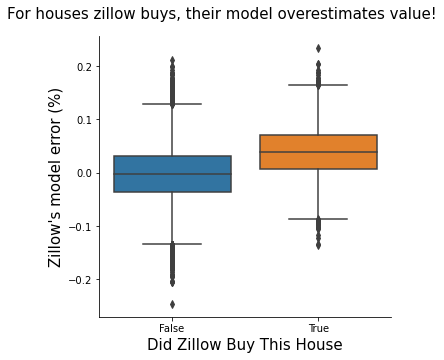

In [17]:
# sns.relplot(data=house_mkt.sample(10000), x='zillow_error%', y='true_val', hue='zillow_buys')
myplot = sns.catplot(
    data=house_mkt, kind="box",
    y="zillow_error%", x="zillow_buys",
)
myplot.set_xlabels('Did Zillow Buy This House', fontsize=15) # not set_label
myplot.set_ylabels("Zillow's model error (%)", fontsize=15)
myplot.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
myplot.fig.suptitle('For houses zillow buys, their model overestimates value!', fontsize=15)
plt.show()

Which means that they lose a lot of money!

In [7]:
# just get some stats for 
avg_prof = house_mkt['zillow_profit'].mean()
total_prof = avg_prof*house_mkt['zillow_profit'].count()
total_prof_mill = np.floor(total_prof/1000000)

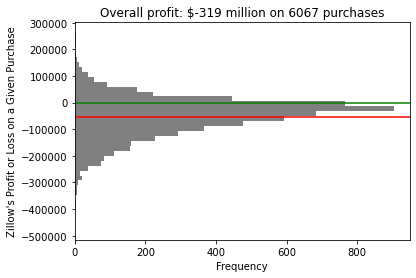

In [18]:
titl = 'Overall profit: $%i million on %i purchases' % (total_prof_mill, house_mkt['zillow_profit'].count())
ax = house_mkt.plot(y='zillow_profit',kind='hist',bins=40,color='grey',
                    title=titl,
                    orientation='horizontal',
                    ylabel="Zillow's Profit or Loss on a Given Purchase",legend=False)
ax.axhline(0,color='green')
ax.axhline(avg_prof,color='red')
plt.show()

This model above only has a relatively benign version of adverse selection. (In real life, homeowners with a low estimate of their house's value tend to have an idea that there is something wrong with the house, like mold... or ghosts. Meaning, when Zillow thinks a house is worth a lot more than the homeowner, the true value should be closer to the homeowners.) 

With severe adverse selection, when a house has problem and the owner knows it, the owner will have a low AND accurate valuation.

In [10]:
house_mkt.describe()


,true_val,owner_error%,owner_guess,zillow_error%,zillow_guess,zillow_pays,zillow_profit
count,1.000000e+05,100000.000000,1.000000e+05,100000.000000,1.000000e+05,6.067000e+03,6067.000000
mean,1.376406e+06,0.000275,1.376554e+06,0.000073,1.376351e+06,1.418498e+06,-52533.018350
std,6.491720e+05,0.100170,6.664556e+05,0.049839,6.532104e+05,6.757378e+05,74311.603659
min,2.500296e+05,-0.481564,1.611184e+05,-0.246412,2.170489e+05,2.318504e+05,-478223.998283
25%,8.135775e+05,-0.067405,8.070198e+05,-0.033547,8.112730e+05,8.458397e+05,-91163.585799
50%,1.380534e+06,0.000241,1.365317e+06,0.000087,1.376907e+06,1.404546e+06,-39461.816866
75%,1.936708e+06,0.067829,1.918516e+06,0.033662,1.932640e+06,1.998015e+06,-6864.497468
max,2.499986e+06,0.499328,3.214899e+06,0.233651,2.925479e+06,2.855418e+06,264609.453278
